# Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from utils.Auxiliary import *

# Input


In [14]:
DataType = "MONK3"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
RandomForesResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", 0.0)
AnalyzedData011 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.011)
AnalyzedData015 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.015)
AnalyzedData017 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.017)


# Shape

In [16]:
ShapeTable = {"DUREAL":[AnalyzedData011["Error_DUREAL"].shape[0],
                        AnalyzedData015["Error_DUREAL"].shape[0],
                        AnalyzedData017["Error_DUREAL"].shape[0]],
              "UNREAL": [AnalyzedData011["Error_UNREAL"].shape[0],
                         AnalyzedData015["Error_UNREAL"].shape[0],
                         AnalyzedData017["Error_UNREAL"].shape[0]]}
ShapeTable = pd.DataFrame(ShapeTable)
# ShapeTable.index = range(15,19,2)
ShapeTable

,DUREAL,UNREAL
0,99,100
1,100,100
2,100,100


# Run Time

In [4]:
TimeTable = {"DUREAL Mean":[str(round(np.mean(AnalyzedData015["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData017["Time_DUREAL"])/60,2))],
              "UNREAL Mean": [str(round(np.mean(AnalyzedData015["Time_UNREAL"])/60,2)),
                         str(round(np.mean(AnalyzedData017["Time_UNREAL"])/60,2))],
                "DUREAL max":[str(round(np.max(AnalyzedData015["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData017["Time_DUREAL"])/60,2))],
              "UNREAL max": [str(round(np.max(AnalyzedData015["Time_UNREAL"])/60,2)),
                         str(round(np.max(AnalyzedData017["Time_UNREAL"])/60,2))]
                         }
TimeTable = pd.DataFrame(TimeTable)
TimeTable.index = range(15,19,2)
TimeTable

,DUREAL Mean,UNREAL Mean,DUREAL max,UNREAL max
15,46.65,39.58,170.56,109.17
17,75.71,67.95,306.79,299.59


# Error Vec

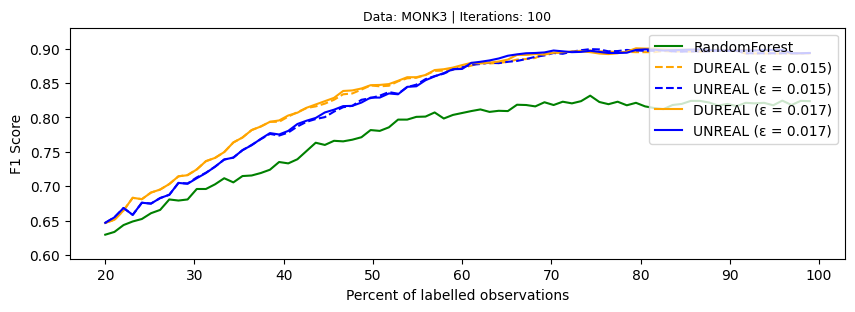

In [5]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedData015['Error_DUREAL'].shape[0]}"
colors = {
    "RandomForest": "green",
    "DUREAL015": "orange",
    "UNREAL015": "blue",
    "DUREAL017": "orange",
    "UNREAL017": "blue"
}

linestyles = {
    "RandomForest": "solid",
    "DUREAL015": "dashed",
    "UNREAL015": "dashed",
    "DUREAL017": "solid",
    "UNREAL017": "solid"
}

LegendMapping = {
    "DUREAL015": "DUREAL (ε = 0.015)",
    "UNREAL015": "UNREAL (ε = 0.015)",
    "DUREAL017": "DUREAL (ε = 0.017)",
    "UNREAL017": "UNREAL (ε = 0.017)"
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 RandomForest = RandomForesResults["Error_RF"],
                 DUREAL015 = AnalyzedData015["Error_DUREAL"],
                 UNREAL015 = AnalyzedData015["Error_UNREAL"],
                 DUREAL017 = AnalyzedData017["Error_DUREAL"],
                 UNREAL017 = AnalyzedData017["Error_UNREAL"],
                 Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "F1 Score",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                 CriticalValue = 1.96)

# Input

In [6]:
AnalyzedDataSmall = AnalyzedData015
AnalyzedDataLarge = AnalyzedData017

# Selection History

In [7]:
SelectionHistoryRank_RF = SelectionHistoryRankFunction(RandomForesResults["SelectionHistory_RF"], DataType = DataType)
SelectionHistoryRank_UNREALLarge = SelectionHistoryRankFunction(AnalyzedDataLarge["SelectionHistory_UNREAL"], DataType = DataType)
SelectionHistoryRank_DUREALLarge = SelectionHistoryRankFunction(AnalyzedDataLarge["SelectionHistory_DUREAL"], DataType = DataType)
SelectionHistoryRank_RF.sort_values(by = "AverageRank").head()
SelectionHistoryRank_UNREALLarge.sort_values(by = "AverageRank").head()
SelectionHistoryRank_DUREALLarge.sort_values(by = "AverageRank").head()

,AverageRank,Y,a1_1,a1_2,a2_1,a2_2,a3_1,a4_1,a4_2,a5_1,a5_2,a5_3,a6_1
17,22.065574,True,True,False,False,True,True,True,False,False,False,True,True
69,22.698413,True,False,True,False,True,False,True,False,False,True,False,False
95,23.828125,True,False,False,True,False,False,False,True,False,False,True,False
79,24.059701,False,False,True,False,False,True,False,False,False,False,True,True
108,24.396825,True,False,False,False,False,True,True,False,False,False,True,False


# Tree Counts

In [8]:
UNREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioSmall = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioSmall, 
                              DUREAL_Average_TreeCountsRatioSmall,
                              np.round(UNREAL_Average_TreeCountsRatioSmall - DUREAL_Average_TreeCountsRatioSmall,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

UNREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioLarge = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioLarge, 
                              DUREAL_Average_TreeCountsRatioLarge,
                              np.round(UNREAL_Average_TreeCountsRatioLarge - DUREAL_Average_TreeCountsRatioLarge,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

# Number of All Trees

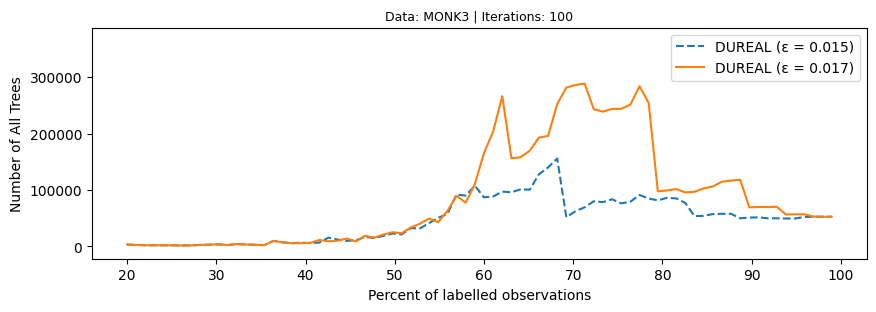

In [9]:
### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 DUREAL015 = AnalyzedData015["TreeCounts_ALL_UNREAL"],
                #  UNREAL015 = AnalyzedData015["TreeCounts_UNIQUE_UNREAL"],
                 DUREAL017 = AnalyzedData017["TreeCounts_ALL_UNREAL"],
                #  UNREAL017 = AnalyzedData017["TreeCounts_UNIQUE_UNREAL"],
                # Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "Number of All Trees",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                 CriticalValue = 1.96)

## Number of Unique Trees

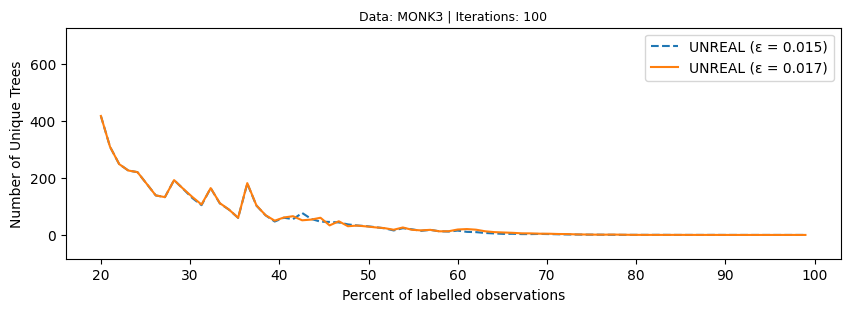

In [10]:
### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                #  DUREAL015 = AnalyzedData015["TreeCounts_ALL_UNREAL"],
                 UNREAL015 = AnalyzedData015["TreeCounts_UNIQUE_UNREAL"],
                #  DUREAL017 = AnalyzedData017["TreeCounts_ALL_UNREAL"],
                 UNREAL017 = AnalyzedData017["TreeCounts_UNIQUE_UNREAL"],
                # Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "Number of Unique Trees",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                 CriticalValue = 1.96)